# Introduction

In this notebook I cover the basic theory and implementation of a PID control.

The notebook will be divided into following sections:
    1) Dynamic behaviour of first and second order systems.
    2) Typical responses of PID control systems.
    3) Stability of closed loop control systems.
    4) PID controller Design and tuning.
    5) Shortcomings of a PID controller.

# Setting up MathJax for numbering

In [7]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [8]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

# Dynamic behaviour of first order systems

As a starting point, let us analyse the dynamics of a first order system

A first order system with state $y$ and input $u$ in standard form is written as:

\begin{equation}
\tau \frac{dy(t)}{dt} + y(t) = k u(t), \label{eq:standard}
\end{equation}

where $\tau$ is known as the time-constant and $k$ is known as the gain of the system. Moving forward, we simplify the notation and write $y(t)$ and $u(t)$ as $y$ and $u$ respectively.

The parameter $k$ is known as the gain of the system because 1 unit change in $u$ produces $k$ units of change in $y$ at steady state. Steady state is defined as the state when $y$ becomes steady (constant).

To see this we simulate system \ref{eq:standard} with the parameter values $\tau = 1, k = 2$ and the following control input:

\begin{equation}
u =
\begin{cases}
      0, & \text{if}\ t < 0 \\
      1, & \text{if}\ t \geq 0
    \end{cases}
\end{equation}

Text(0, 0.5, 'u(t)')

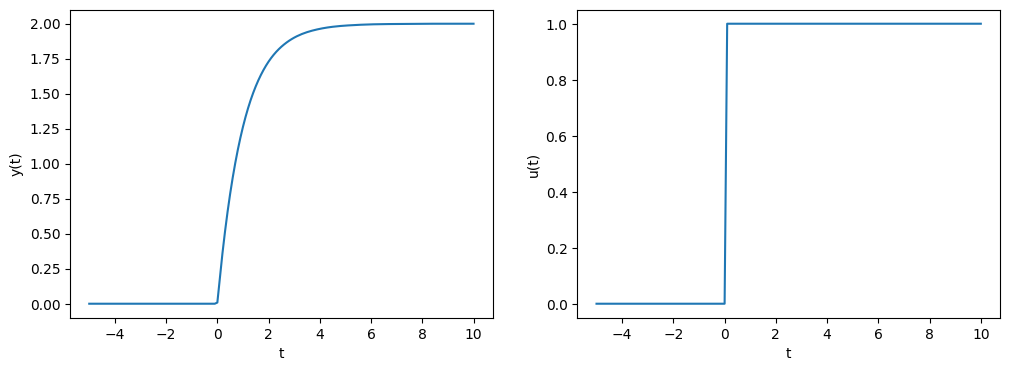

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def u(t):
    return np.where(t < 0, 0, 1) 

tau = 1
k = 2
F = lambda t, y: (-y + k*u(t)) / tau

t_eval = np.arange(-5, 10.1, 0.1)
sol = solve_ivp(F, [-5, 10], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.t))
plt.xlabel('t')
plt.ylabel('u(t)')

Observe that in t = 1 unit, $y$ attains 63% of its final value. In t = 3 units, 95% of its final value and in t = 5 units, 99.3% of its final value. Since time can be normalized by $\tau$, this phenomena can be expected in $\tau$ units when $\tau \neq 1$. The steady state value of y is twice the steady state vlaue of $u$.

NOTE: To analyse the behaviour of a system at steady state, set all time derivative terms to zero. 

In the case of system \ref{eq:standard}, 
$$
y_s = k u_s,
$$
where the subscripts s denote the steady state values.

# Canonical form

In cannonical form, system \ref{eq:standard} is written as

\begin{equation}
\frac{dy}{dt} = a y + b u \label{eq:canonical}
\end{equation}

where $a = 1/\tau$ and $b = k/ \tau$. 

In general, the canonical form for a $n^{th}$ order linear dynamical system is written as:

\begin{equation}
    \frac{d\mathbf{y}}{dt} = A \mathbf{y} + B \mathbf{u} \label{eq:n_canonical},
\end{equation}

where $\mathbf{y}$ is a $n$ dimensional state vector, $\mathbf{u}$ is a $m$ dimensional input vector. $A$ is a $n\times n$ matrix and $B$ is a $n \times m$ matrix.

Any $n^{th}$ order differential equation can be converted into cannonical form.

For example, take the case of a harmonic oscillator with damping:

\begin{equation}
    \frac{d^2 x}{dt^2} = - k x - \eta \frac{dx}{dt} + b u, \label{eq:harmonic}
\end{equation}

where $x$ is the position of the oscilator, $k$ is the harmonic constant, and $\eta$ is the drag co-efficient.

Equation \ref{eq:harmonic} can be written in canonical form as:

\begin{equation}
\frac{d}{dt} \begin{bmatrix} x\\v \end{bmatrix}=
    \begin{bmatrix} 0&1\\-k&-\eta \end{bmatrix}
 \begin{bmatrix} x\\v \end{bmatrix}
 + \begin{bmatrix} 0\\b \end{bmatrix} u. \label{eq:harmonic_canonical}
\end{equation}

The harmonic oscillator is considered a linear system, and linear systems can always be written into a canonical form.
Recall, a system $\mathcal{L}$ is considered linear iff
$$
\mathcal{L}(y_1 + y_2) = \mathcal{L}(y_1) + \mathcal{L}(y_2) 
$$

# Dynamic behaviour of second order systems

A $2^{nd}$ order differentail equation in standard form is written as

\begin{equation}
    \tau^2 \frac{d^2 y}{dt^2} + 2\zeta\tau \frac{dy}{dt} + y  = ku, \label{eq:2_standard}
\end{equation}

where $\tau$ is the time constant of the system, $\zeta$ is the damping co-efficient, and $k$ is the gain of the system.

A closed form solution to \ref{eq:2_standard} can be dervied using many techniques like Laplace transform, Green's function, or transforming the equation into canonical form and using matrix exponentials [1]. The analytic solution has the form

\begin{equation}
    y(t) = y_H(t) + k \int_0^t  y_H(t-t') \;u(t') dt', \label{eq:2_sol}
\end{equation}

\begin{equation*}
    y_H(t) = A e^{-\frac{t}{\big( \zeta - \sqrt{\zeta^2 - 1} \big)\tau}} + B e^{-\frac{t}{\big( \zeta + \sqrt{\zeta^2 - 1} \big)\tau}}.
\end{equation*}

Here $y_H$ dentoes the homogenous solution to \ref{eq:2_standard}

Observe that the behaviour of the exponent in $y(t)$ changes depending on wheather $\zeta > 1$, $\zeta = 1$, $0 < \zeta < 1$, and $\zeta < 0$.

For now, we focus out attention to the behaviour of the system as $\zeta$ is varied.

## Over-damped system

When $\zeta > 1$, the system is called an over-damped system.

Throuhout our analysis we assume $\tau = 1$ and $k = 2$ to simplify our analysis. The effect of $\tau$ and $k$ on a system was explained in the section _Dynamic behaviour of first order systems_. To recap, $\tau$ relates to how fast the system responds and $k$ multiplies the effect of $u$ on the system at steady state.

To simulate an over-damped system, we take $\zeta = 2$. The initial condition is take to be $y(0) = 0$ and $y'(0) = 0$

Text(0, 0.5, 'u(t)')

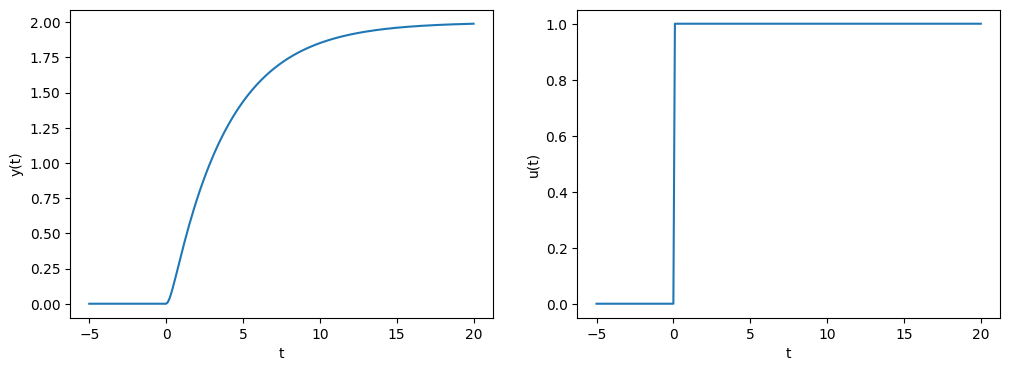

In [30]:
F = lambda t, s: np.dot(np.array([[0, 1], [-1, -4]]), s) + np.array([0 , 2 * u(t)])

t_eval = np.arange(-5, 20.1, 0.1)
sol = solve_ivp(F, [-5, 20], [0, 0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y.T[:, 0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.t))
plt.xlabel('t')
plt.ylabel('u(t)')

Two observations:

1) The steady state value of y is two times the steady state value of u

2) System \ref{eq:2_standard} takes longer to reach steady state than \ref{eq:standard}. This is explained by the exponent of the homogenous solution in \ref{eq:2_sol}.

## Critically damped system

We take the case of $\zeta = 1$, also known as a critically damped system. Al other parameter values are kept the same.

Text(0, 0.5, 'u(t)')

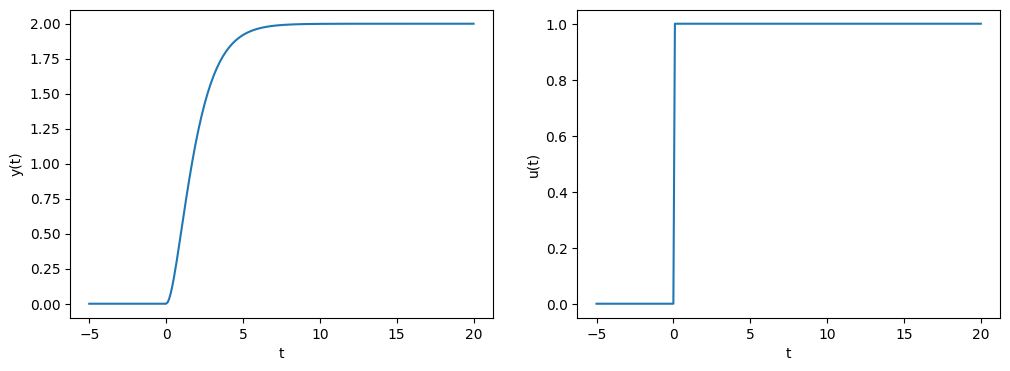

In [33]:
F = lambda t, s: np.dot(np.array([[0, 1], [-1, -2]]), s) + np.array([0 , 2 * u(t)])

t_eval = np.arange(-5, 20.1, 0.1)
sol = solve_ivp(F, [-5, 20], [0, 0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y.T[:, 0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.t))
plt.xlabel('t')
plt.ylabel('u(t)')

Observation: the solution behaves very similar to a first order system with the same time constant. This can be verified from \ref{eq:2_sol}

NOTE: The homogenous solution for the case $\zeta = 1$ is given by
$$
    y_H(t) = A e^{-\frac{t}{\tau}} + B \; t\; e^{-\frac{t}{\tau}}
$$

## Under-damped case

When $0 < \zeta < 1$, the exponent in \ref{eq:2_sol} become complex and the solution shows oscillating behaviour.

For simulation, we take $\zeta = 0.9$

Text(0, 0.5, 'u(t)')

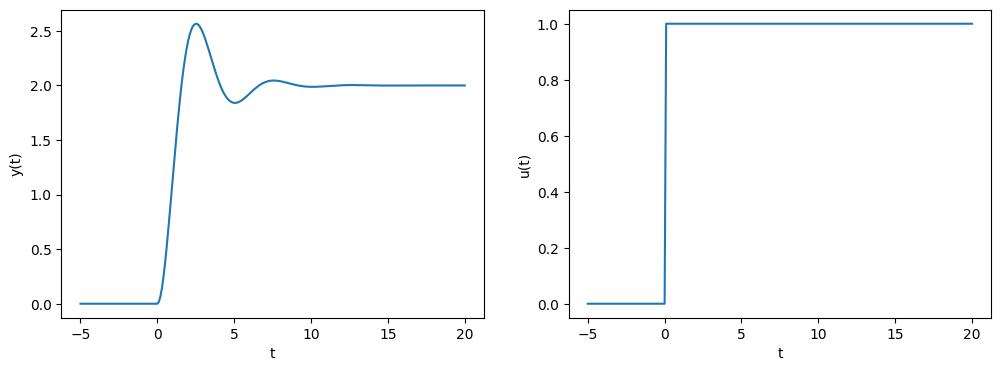

In [38]:
F = lambda t, s: np.dot(np.array([[0, 1.8], [-1, -1]]), s) + np.array([0 , 2 * u(t)])

t_eval = np.arange(-5, 20.1, 0.1)
sol = solve_ivp(F, [-5, 20], [0, 0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y.T[:, 0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.t))
plt.xlabel('t')
plt.ylabel('u(t)')

Observe that the solution reaches $y = 2$ faster but overshoots and slowly dampens towards steady state.

In a traditional setting, when the dynamics of the system you are studying are not known, engineers would apply a step change to their input and look at the state response to calculate the values of $\tau, \zeta, k$. The science of determining the system by manipulating inputs is known as System Identification in control literature [3].

## Stable and Unstable systems

A system is called stable when a small disturbace to the state $y$ decreases and goes to zero with time. 

Correspondinly, a system is called unstable when a small disturbance to the state $y$ does not go to zero. 

In \ref{eq:canonical}, the system will be stable when $a < 0$ and unstable when $a>= 0$.We can directly observe this when we integrate \ref{eq:standard} to obtain

\begin{equation}
    y(t) = e^{at} y(0) + b \int_0^t e^{a(t-t')} u(t') dt \label{eq:integral}.
\end{equation}

Here $y(0)$ is the initial state of the system. 

To understand this clearer, take $y(0) = 0$, $b = 1$ and let $u(t)$ be

\begin{equation}
u (t) =
\begin{cases}
        0, & \text{if}\ t \leq 0 \\
      \epsilon, & \text{if}\ 0<t < \delta \\
      0, & \text{if}\ t \geq \delta.
    \end{cases}
\end{equation}.

Equation \ref{eq:integral} then simplifies to

\begin{equation}
    y(t) = 
    \begin{cases}
        0, & \text{if}\ t \leq 0 \\
      (e^{at} - 1) \; \epsilon/a, & \text{if}\ 0<t < \delta \\
      e^{at} ( 1 - e^{a\delta}) \;{\epsilon}/{a}, & \text{if}\ t \geq \delta. \label{eq:stable}
    \end{cases}
\end{equation}

The concept of stability is perfectly captured in \ref{eq:stable}. 
No matter how small the values of $\epsilon$ and $\delta$ a.k.a. the disturbance, the stability of the system is determined by sign of a.

For an $n^{th}$ order system \ref{eq:n_canonical}, the system is considered stable when all the eigenvalues of $A$ are negative. The system is unstable when atleast one eigenvalue of $A$ is non-negative.

To prove this, we transform \ref{eq:n_canonical} into n independant $1^{st}$ order systems.

Using eigendecompsotion of a matrix (https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix), 

$$A = Q\Lambda Q^{-1},$$

where $\Lambda$ is (mostly) a diagonal matrix containing the eigenvalues of $A$. $Q$ are the corresponding eigenvectors of $A$

Define a new co-ordinate space $z$ such that
$$z = Q^{-1}y$$

Equation \ref{eq:n_canonical} then transforms to

\begin{equation}
    \frac{dz}{dt} = \Lambda z + Q^{-1}B u \label{eq:transform}.
\end{equation}

Equation \ref{eq:transform} can be written into n first order equations of the form

\begin{equation}
    \frac{dz_i}{dt} = \lambda_i z_i + b_i u_i,
\end{equation}

where the sub-script $i$ denotes the $i^{th}$ entry of \ref{eq:transform}. $\lambda_i$ is the $i^{th}$ eigenvalue of $A$. For stability, all $z_i$ have to be stable, i.e., all $\lambda_i < 0$. 

# PID control

We are now in a good position to understand the concept of control. 

The main goal of control is to guide the system output towards a constant setpoint $y_{sp}$. We have to do this by manipulating the input variable $u$, and this process needs to be automatic without (or with minimal) human intervention.

NOTE: This is a common setup in engineering applications, for e.g., controlling the output of your chemical plant to produce a product with constant chemical composiiton, temperature. In this case, the control input $u$ will be something like input flowrate or the heat supplied to the reactor.

NOTE: It is also possible to have your setpoint as a function of time $y_{sp}(t)$. This is known as setpoint tracking and is used in more advanced control applications like drone control or self-driving cars. Since this is an intro to control, we will limit our attention to constant setpoint.  

We define $e(t)$ as the error between the system state $y(t)$ and its setpoint $y_{sp}$

\begin{equation}
    e(t) = y(t) - y_{sp}
\end{equation}

## Proportional (P) Controller

The most basic kind of controller one could come up with is to have the control input proportional to the error $e(t)$.

\begin{equation}
    u(t) = - K e(t) \label{eq:P}
\end{equation}

Let's study the behaviour of this system when we apply a proportional controller on \ref{eq:standard}.

We keep the setpoint at zero before time zero and change it to 2 after time zero.

\begin{equation}
y_{sp} =
\begin{cases}
      0, & \text{if}\ t < 0 \\
      2, & \text{if}\ t \geq 0
    \end{cases}
\end{equation}

To simulate \ref{eq:standard}, we take the parameter values $\tau = 1$, $k = 2$. 

We would like to study the effect of the proportional controller $u(t) = -Ke(t)$ as we change the value of the proporational gain $K$.

Consider the case $K=1$.

Text(0.5, 0.98, 'K = 1')

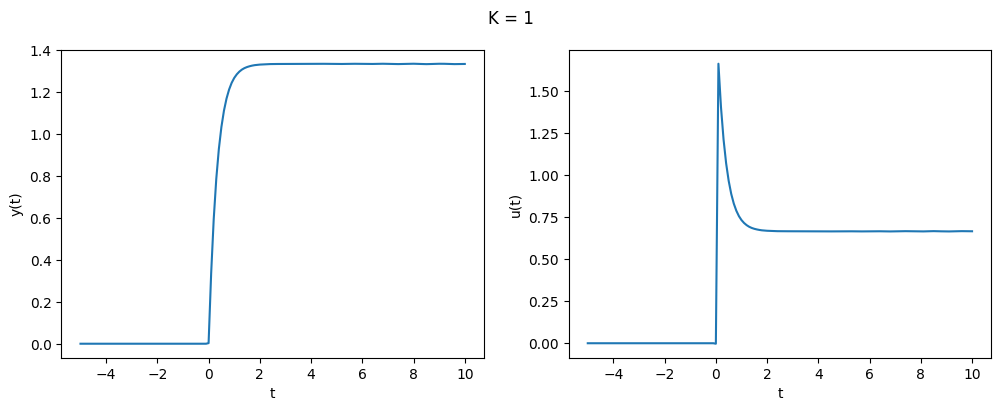

In [65]:
def ysp(t):
    return np.where(t < 0, 0, 2) 

def u(y, ysp, K):
    return -K*(y - ysp)

K = 1

tau = 1
k = 2
F = lambda t, y: (-y + k*u(y, ysp(t), K)) / tau

t_eval = np.arange(-5, 10.1, 0.1)
sol = solve_ivp(F, [-5, 10], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.y[0], ysp(sol.t), K))
plt.xlabel('t')
plt.ylabel('u(t)')

plt.suptitle("K = 1")

Observations:

1) The steady state value of $y$ is lower than the value of the set-point.
2) At $t=0$ when the set point is changed to 2, the control input $u$ has a sharp spike and then decay's to a constant value. This is expected since $u(0) = -K(y(0) - y_{sp}(0))$
3) The steady state in \ref{eq:standard} is reached faster with a proportional controller compared to a step change in input.

## Offset in proportional controller

To calculate the steady state value of $y$ in \ref{eq:standard}, we set all the tie derivate terms to zero. This gives us

\begin{equation}
    y_s = k u_s = -k*K*(y_s - y_{sp}).
\end{equation}

Rearranging this equation gives us the steady state value of $y$.

\begin{equation}
    y_s = \frac{kK}{1 + kK} y_{sp}.
\end{equation}

We see that for a proporational controller applied on a first order system, the steady state value will always be lower than the set point value.

The offset between the steady state $y_s$ and the setpoint $y_{sp}$ is given by

\begin{equation}
\text{Offset} = y_s - y_{sp} = \frac{y_{sp}}{1+kK} \label{eq:offset}
\end{equation}

In the simulation above, the offset value is 2/3.

If we look at the equations again, a non-zero value of the offset makes sense. This is because if $y$ were to equal to the set point then $u = -K (y - y_{sp}) = 0$. $u = 0$ implies that at steady state $y = 0$, which is a contradiction. 

So it seems like for a non-zero control input, a proportional controller requires a non-zero offset. This is a drawback of using the proportional controller.

The offset value is inversely realted to the value of the proposrtional gain. 

To observe this we perform two additional simulations, one with $K = 5$ and the other with $K = 20$.

Text(0.5, 0.98, 'K = 5')

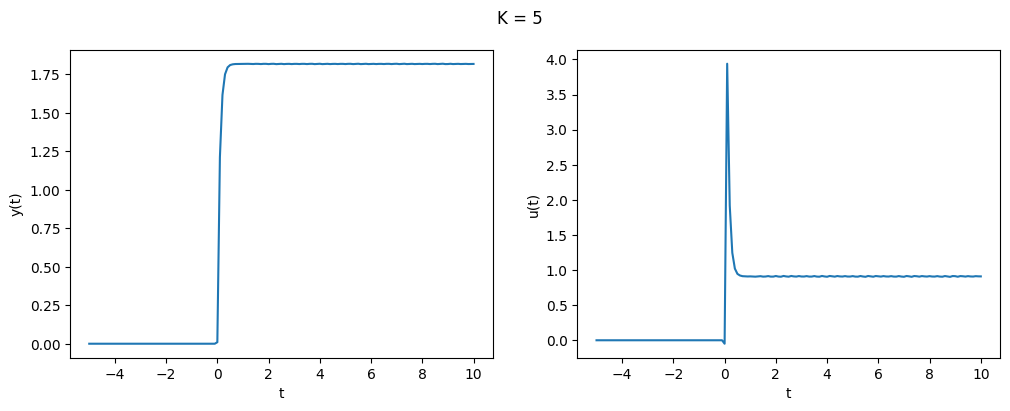

In [63]:
K = 5

tau = 1
k = 2
F = lambda t, y: (-y + k*u(y, ysp(t), K)) / tau

t_eval = np.arange(-5, 10.1, 0.1)
sol = solve_ivp(F, [-5, 10], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.y[0], ysp(sol.t), K))
plt.xlabel('t')
plt.ylabel('u(t)')

plt.suptitle("K = 5")

Text(0.5, 0.98, 'K = 20')

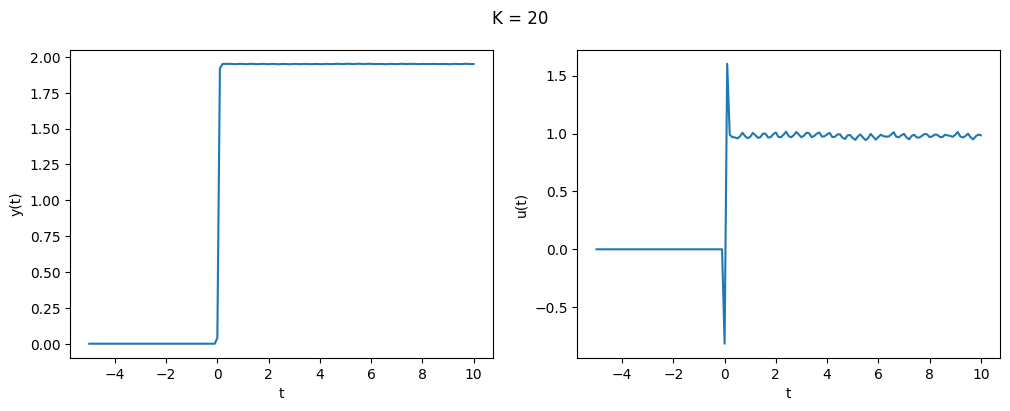

In [64]:
K = 20

tau = 1
k = 2
F = lambda t, y: (-y + k*u(y, ysp(t), K)) / tau

t_eval = np.arange(-5, 10.1, 0.1)
sol = solve_ivp(F, [-5, 10], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.y[0], ysp(sol.t), K))
plt.xlabel('t')
plt.ylabel('u(t)')

plt.suptitle("K = 20")

Notice, as $K$ gets larger the offest of $y$ from $y_{sp} = 2$ gets smaller.

Also notice that as the value of K gets larger, the controller gets more aggressive and converges to the steady state faster.

To see this, substitue $u = -K ( y - y_{sp})$ into \ref{eq:standard} to obtain

\begin{equation}
    \frac{\tau}{(1 + kK)} \frac{dy}{dt} + y = \frac{kK}{(1 + kK)}y_{sp} \label{eq:K_dyna}.
\end{equation}

As $K$ gets larger the time-constant of \ref{eq:K_dyna} gets smaller. Therefore, the system converges to steady-state faster.

# Proportional Integral (PI) controller

To address the issue of offset with proportional controllers, we add a second term to the control input that integrates the error.

\begin{equation}
    u(t) = -K \Big( e(t) + \frac{1}{\tau_I}\int_0^t e(t') dt' \Big). \label{eq:PI}
\end{equation}

Differentiating \ref{eq:PI} with respect to t, 

\begin{equation}
    \frac{du}{dt} = -K\Big(\frac{de}{dt} + \frac{1}{\tau_I}e(t)\Big). \label{eq:PI_d}
\end{equation}

Equation \ref{eq:PI_d} ensures that at steady state $e(t) = 0$.

To simulate a PI controller on \ref{eq:standard}, we assume the following parameter values
$\tau = 1, k = 2, K = 1, \tau_I = 1, y_{sp} = 2$

Text(0.5, 0.98, 'PI controller: K = 1, T_I = 1')

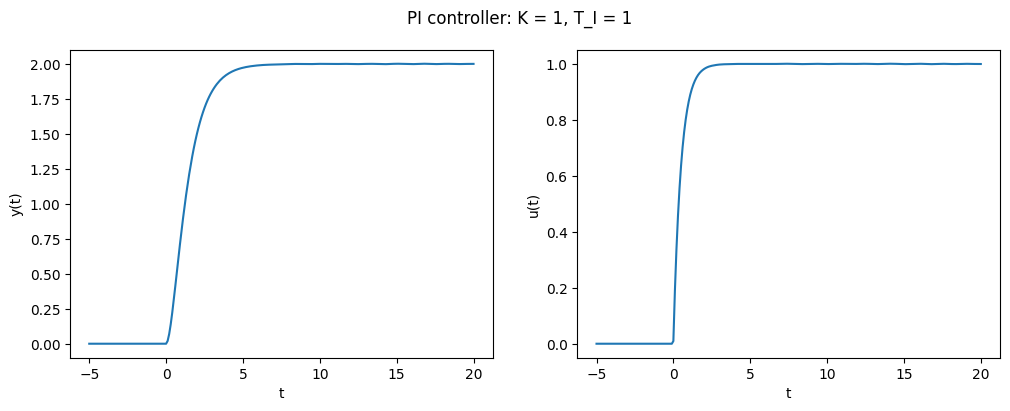

In [106]:
def ysp(t):
    return np.where(t < 0, 0, 2) 

K = 1
tauI = 1
tau = 1
k = 2

F = lambda t, s: np.dot(np.array([[-k*K/tau, K/tau-K/tauI], [k/tau, -1/tau]]), s) + np.array([K/tauI*ysp(t) , 0])

t_eval = np.arange(-5, 20.1, 0.1)
sol = solve_ivp(F, [-5, 20], [0, 0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y.T[:, 1])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, sol.y.T[:, 0])
plt.xlabel('t')
plt.ylabel('u(t)')

plt.suptitle("PI controller: K = 1, T_I = 1")

We perform two additional simulations with values $K = 5, \tau_I = 1$ and $K = 1, \tau_I = 0.2$.

Text(0.5, 0.98, 'PI controller: K = 5, T_I = 1')

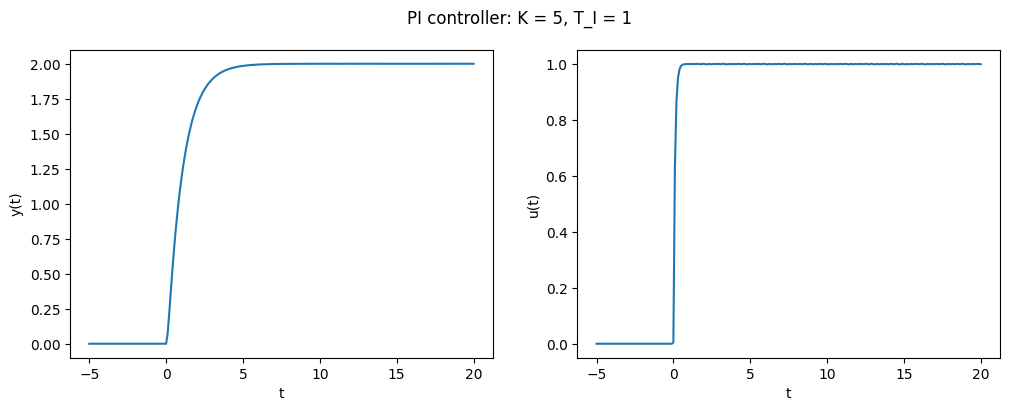

In [109]:
K = 5
tauI = 1
tau = 1
k = 2

F = lambda t, s: np.dot(np.array([[-k*K/tau, K/tau-K/tauI], [k/tau, -1/tau]]), s) + np.array([K/tauI*ysp(t) , 0])

t_eval = np.arange(-5, 20.1, 0.1)
sol = solve_ivp(F, [-5, 20], [0, 0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y.T[:, 1])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, sol.y.T[:, 0])
plt.xlabel('t')
plt.ylabel('u(t)')

plt.suptitle("PI controller: K = 5, T_I = 1")

Text(0.5, 0.98, 'PI controller: K = 1, T_I = 0.2')

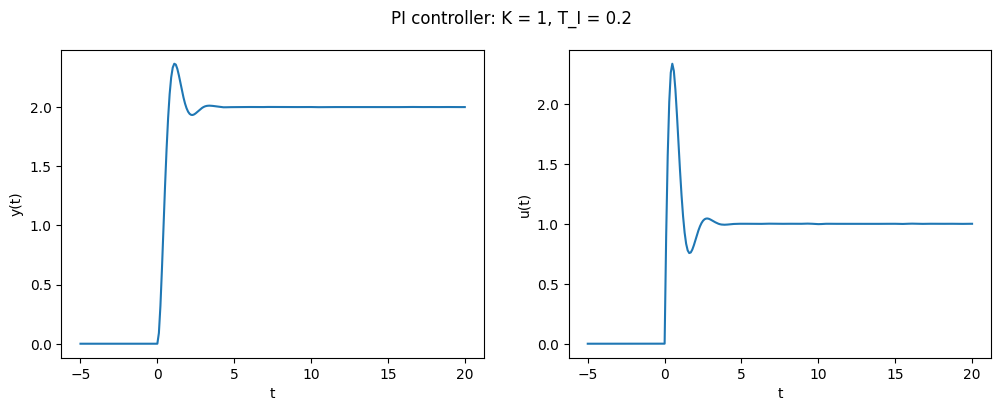

In [108]:
K = 1
tauI = 0.2
tau = 1
k = 2

F = lambda t, s: np.dot(np.array([[-k*K/tau, K/tau-K/tauI], [k/tau, -1/tau]]), s) + np.array([K/tauI*ysp(t) , 0])

t_eval = np.arange(-5, 20.1, 0.1)
sol = solve_ivp(F, [-5, 20], [0, 0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y.T[:, 1])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, sol.y.T[:, 0])
plt.xlabel('t')
plt.ylabel('u(t)')

plt.suptitle("PI controller: K = 1, T_I = 0.2")

Observations:

1) PI controller removes offset
2) increasing the value of $K$ makes the controller more aggressive
3) decreasing the vlaue of $\tau_I$ makes the controller more aggressive, sometimes at the cost of overshoot the setpoint
    

# Proportional Integral Derivative (PID) controller

The proportional component uses information about the present state of the system and the integral component uses information on the historical state of the system. To incorporate information about the future state of the error, we use the use the taylor expansion

$$
    e(t+\tau_D) = e(t) + \tau_D \frac{de}{dt}
$$

Including this into our control input gives us a PID controller

\begin{equation}
    u(t) = -K \Big( e(t) + \frac{1}{\tau_I}\int_0^t e(t') dt' + \tau_D \frac{de}{dt}\Big). \label{eq:PID}
\end{equation}

We will skip the implementation of the PID controller for the time being. 

# Controller design and tuning

Choosing a large value of $K$ is not always the right option. This is because a large value of $K$ makes the controller more agressive. This can be problematic, since a small deviation in $y$ ---either becasue of real world noise or numerical error--- can cause a large change is $u$. This is visible in the previous simulation with $K = 20$, where we observe the value of u osciallate. This is most likely happening due to numerical errors in $y$ during integration. 

# Shortcomings of PID control

    1) Cannot be applied to highly non-linear processes
    2) cannot be applied to systems with time delay

# References

[1] Kravaris, Costas, and Ioannis K. Kookos. Understanding process dynamics and control. Cambridge University Press, 2021.

[2] https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

[3] Keesman, Karel J., and Karel J. Keesman. System identification: an introduction. Vol. 2. London: Springer, 2011.

In [31]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>